# Indian Restaurant

### Zomato Restaurant Success Factor analysis

* Zomato is a popular online food delivery and restaurant aggregator platform that operates in over 23 countries. The company's dataset contains a wealth of information about restaurants, including their menus, pricing, reviews, and ratings. By conducting EDA on this dataset, we can gain valuable insights into the factors that influence restaurant performance and customer behavior on the platform. In this analysis, we will focus on identifying the key factors that contribute to a restaurant's success or failure on Zomato, as well as the factors that drive customer behavior and preferences. By doing so, we can gain a deeper understanding of the platform's operations and identify opportunities for improvement.

In [1]:
# import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#import Csv Files using Pandas

df = pd.read_csv('Indian-Resturants.csv')

In [3]:
df.head(5)

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


In [4]:
# Description of Dataframe

df.describe(include='all')

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944,211944,211944,211810,211944,211944.000000,211944,211944.000000,211944.000000,...,211944.000000,211944,211944,211944.000000,211944,211944.000000,211944.000000,211896.0,211944.000000,211944.0
unique,NaN,41100,27,55568,50657,99,NaN,3731,NaN,NaN,...,NaN,1,31455,NaN,39,NaN,NaN,NaN,NaN,NaN
top,NaN,Domino's Pizza,['Quick Bites'],https://www.zomato.com/chennai/3bs-buddies-bar...,"Laxman Jhula, Tapovan, Rishikesh",Chennai,NaN,Civil Lines,NaN,NaN,...,NaN,Rs.,"['Dinner', 'Takeaway Available', 'Lunch', 'Cas...",NaN,Very Good,NaN,NaN,NaN,NaN,NaN
freq,NaN,3108,64390,169,299,11630,NaN,3660,NaN,NaN,...,NaN,211944,3352,NaN,65451,NaN,NaN,NaN,NaN,NaN
mean,1.349411e+07,NaN,NaN,NaN,NaN,NaN,4746.785434,NaN,21.499758,77.615276,...,1.882535,NaN,NaN,3.395937,NaN,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,NaN,NaN,NaN,NaN,NaN,5568.766386,NaN,22.781331,7.500104,...,0.892989,NaN,NaN,1.283642,NaN,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,...,1.000000,NaN,NaN,0.000000,NaN,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,NaN,NaN,NaN,NaN,NaN,11.000000,NaN,15.496071,74.877961,...,1.000000,NaN,NaN,3.300000,NaN,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,NaN,NaN,NaN,NaN,NaN,34.000000,NaN,22.514494,77.425971,...,2.000000,NaN,NaN,3.800000,NaN,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,NaN,NaN,NaN,NaN,NaN,11306.000000,NaN,26.841667,80.219323,...,2.000000,NaN,NaN,4.100000,NaN,362.000000,128.000000,0.0,1.000000,-1.0


In [5]:
#information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [6]:
#Find Null Values

df.isnull().sum()

res_id                       0
name                         0
establishment                0
url                          0
address                    134
city                         0
city_id                      0
locality                     0
latitude                     0
longitude                    0
zipcode                 163187
country_id                   0
locality_verbose             0
cuisines                  1391
timings                   3874
average_cost_for_two         0
price_range                  0
currency                     0
highlights                   0
aggregate_rating             0
rating_text                  0
votes                        0
photo_count                  0
opentable_support           48
delivery                     0
takeaway                     0
dtype: int64

In [7]:
# Null Values Total

df.isnull().sum().sum()

168634

In [8]:
# Find out Duplicates values

df.duplicated().sum()

151527

In [9]:
#Checking Duplicate value

df.res_id.duplicated().sum()

156376

In [10]:
# Checking Duplicacy in res_id.

df.res_id.value_counts().sort_values(ascending=False)

res_id
18631911    169
68976       161
18598737    156
72245       154
18921640    154
           ... 
18700193      1
18700415      1
19000250      1
19068474      1
3201138       1
Name: count, Length: 55568, dtype: int64

In [11]:
# Checking All Columns for any difference or not.

pd.set_option('display.max_columns', None)

In [12]:
df[df.res_id==18631911]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
33504,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
33606,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
33706,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
33786,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
33875,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43788,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
43818,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
43848,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1
43890,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1


In [13]:
#Drop Duplicates

df.drop_duplicates('res_id',inplace=True)

In [14]:
df[df.res_id==18631911]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
33504,18631911,"3B's - Buddies, Bar & Barbecue",['Casual Dining'],https://www.zomato.com/chennai/3bs-buddies-bar...,"1, Hanumantha Road, Near Soma Sunder Ground, T...",Chennai,7,T. Nagar,13.045373,80.233004,NaN,1,"T. Nagar, Chennai",North Indian,"12noon – 4:30pm, 6:30pm – 11:30pm (Mon-Sun)",1200,3,Rs.,"['Takeaway Available', 'Dinner', 'Lunch', 'Cas...",4.5,Excellent,1553,328,0.0,-1,-1


In [15]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,NaN,1,"Manjalpur, Vadodara",Ice Cream,11 AM to 12 Midnight,200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,NaN,1,"Alkapuri, Vadodara","Gujarati, Street Food","11 AM to 3:30 PM, 7 PM to 10:30 PM",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [16]:
# Checking duplicate now.

df.duplicated().sum()

0

In [17]:
df.isnull().sum()

res_id                      0
name                        0
establishment               0
url                         0
address                    18
city                        0
city_id                     0
locality                    0
latitude                    0
longitude                   0
zipcode                 44623
country_id                  0
locality_verbose            0
cuisines                  470
timings                  1003
average_cost_for_two        0
price_range                 0
currency                    0
highlights                  0
aggregate_rating            0
rating_text                 0
votes                       0
photo_count                 0
opentable_support          12
delivery                    0
takeaway                    0
dtype: int64

In [18]:
df

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,NaN,1,"Khandari, Agra","North Indian, South Indian, Mithai, Street Foo...",8:30am – 10:30pm (Mon-Sun),700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,282001.0,1,"Agra Cantt, Agra","North Indian, Mughlai, Rolls, Chinese, Fast Fo...","12:30PM to 12Midnight (Mon, Wed, Thu, Fri, Sat...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,282010.0,1,"Shahganj, Agra","Fast Food, Mithai",9:30 AM to 11 PM,300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,282002.0,1,"Civil Lines, Agra","Desserts, Bakery, Fast Food, South Indian",8am – 11pm (Mon-Sun),300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,NaN,1,"Tajganj, Agra","North Indian, Continental, Italian",11:30 AM to 11:30 PM,1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211882,19142822,Shree Janta Ice Cream,['Dessert Parlour'],https://www.zomato.com/vadodara/shree-janta-ic...,"Ground Floor, 5 Ronak Plaza, Tulsidham Char Ra...",Vadodara,32,Manjalpur,22.270516,73.196408,NaN,1,"Manjalpur, Vadodara",Ice Cream,11 AM to 12 Midnight,200,1,Rs.,"['Cash', 'Takeaway Available', 'Delivery', 'In...",2.9,Average,4,1,0.0,1,-1
211925,18984164,The Grand Thakar,['Casual Dining'],https://www.zomato.com/vadodara/the-grand-thak...,"3rd Floor, Shreem Shalini Mall, Opposite Conqu...",Vadodara,32,Alkapuri,22.310563,73.171163,NaN,1,"Alkapuri, Vadodara","Gujarati, North Indian, Chinese","11:30 AM to 3:30 PM, 7:30 PM to 11 PM",700,2,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Tak...",4.0,Very Good,111,38,0.0,-1,-1
211926,18019952,Geeta lodge,['Casual Dining'],https://www.zomato.com/vadodara/geeta-lodge-al...,"Shop 11, Ground Floor, Atlantis K-10, Tower A,...",Vadodara,32,Alkapuri,22.317731,73.168107,NaN,1,"Alkapuri, Vadodara","Gujarati, Street Food","11 AM to 3:30 PM, 7 PM to 10:30 PM",250,1,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'Ta...",3.9,Good,207,14,0.0,-1,-1
211940,3200996,Raju Omlet,['Quick Bites'],https://www.zomato.com/vadodara/raju-omlet-kar...,"Mahalaxmi Apartment, Opposite B O B, Karoli Ba...",Vadodara,32,Karelibaug,22.322455,73.197203,NaN,1,"Karelibaug, Vadodara",Fast Food,"4pm – 11pm (Mon, Tue, Wed, Fri, Sat, Sun), 4pm...",300,1,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.1,Very Good,187,40,0.0,1,-1


In [19]:
df.address = df.address.fillna('Unknown')

In [20]:
df.zipcode = df.zipcode.fillna('Unknown')

In [21]:
df.cuisines = df.cuisines.fillna('Unknown')

In [22]:
df.timings = df.timings.fillna('Unknown')

In [23]:
df.opentable_support = df.opentable_support.fillna('0.0')

In [24]:
# Checking null values now
df.isnull().sum()

res_id                  0
name                    0
establishment           0
url                     0
address                 0
city                    0
city_id                 0
locality                0
latitude                0
longitude               0
zipcode                 0
country_id              0
locality_verbose        0
cuisines                0
timings                 0
average_cost_for_two    0
price_range             0
currency                0
highlights              0
aggregate_rating        0
rating_text             0
votes                   0
photo_count             0
opentable_support       0
delivery                0
takeaway                0
dtype: int64

In [25]:
df.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,delivery,takeaway
count,5.556800e+04,55568.000000,55568.000000,55568.000000,55568.0,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.000000,55568.0
mean,1.313694e+07,3409.499298,21.450847,76.497131,1.0,528.205874,1.714728,2.958593,223.330352,160.974770,-0.349824,-1.0
std,8.105959e+06,5174.942737,42.901135,10.982976,0.0,595.028447,0.878227,1.464576,618.224019,586.975382,0.933794,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,-1.000000,-1.0
25%,3.001352e+06,8.000000,16.518374,74.645885,1.0,200.000000,1.000000,2.900000,6.000000,1.000000,-1.000000,-1.0
50%,1.869268e+07,26.000000,22.468629,77.106348,1.0,350.000000,1.000000,3.500000,35.000000,10.000000,-1.000000,-1.0
75%,1.887262e+07,11294.000000,26.752959,79.831641,1.0,600.000000,2.000000,3.900000,175.000000,69.000000,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,1.000000,-1.0


<Axes: >

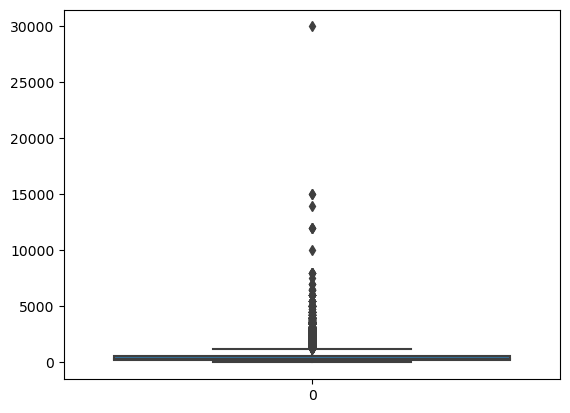

In [26]:
# Checking Outliers form Average cost for two
sns.boxplot(df.average_cost_for_two)

In [27]:
df[df.average_cost_for_two>=10000]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
19730,18758238,Fly Dining,['Fine Dining'],https://www.zomato.com/bangalore/fly-dining-na...,"House Of Life, Near Manyata Tech Park, Nagawar...",Bangalore,4,Nagawara,13.047513,77.610328,560024,1,"Nagawara, Bangalore","Continental, North Indian",2 PM to 11 PM,14000,4,Rs.,"['Serves Alcohol', 'Credit Card', 'Dinner', 'C...",3.8,Good,136,27,0.0,-1,-1
77501,18392031,Gol Bungalow - Taj Falaknuma Palace,['Fine Dining'],https://www.zomato.com/hyderabad/gol-bungalow-...,"Taj Falaknuma Palace, Falaknuma, Hyderabad",Hyderabad,6,"Taj Falaknuma, Falaknuma",17.334338,78.467603,Unknown,1,"Taj Falaknuma, Falaknuma, Hyderabad","North Indian, Italian",7:30 PM to 11:30 PM,15000,4,Rs.,"['Cash', 'Dinner', 'Credit Card', 'No Alcohol ...",3.9,Good,38,20,0.0,-1,-1
100988,18698042,Risala- Umaid Bhawan Palace,['Fine Dining'],https://www.zomato.com/jodhpur/risala-umaid-bh...,"Umaid Bhawan Palace, Circuit House Road, Cantt...",Jodhpur,11301,"Umaid Bhawan Palace, Cantt Area",26.281107,73.046799,Unknown,1,"Umaid Bhawan Palace, Cantt Area, Jodhpur",North Indian,"12:30 PM to 3 PM, 7 PM to 10:30 PM",12000,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Serves Alcoh...",4.1,Very Good,77,57,0.0,-1,-1
101040,18711923,Pillars - Umaid Bhawan Palace,['Fine Dining'],https://www.zomato.com/jodhpur/pillars-umaid-b...,"Umed Bhawan Palace, Cantt Area, Jodhpur",Jodhpur,11301,"Umaid Bhawan Palace, Cantt Area",26.281143,73.047179,Unknown,1,"Umaid Bhawan Palace, Cantt Area, Jodhpur","Continental, Italian, Asian","7 AM to 11 AM, 7 PM to 11 PM",12000,4,Rs.,"['Credit Card', 'Debit Card', 'Dinner', 'Cash'...",3.6,Good,27,10,0.0,-1,-1
101041,18698050,Trophy Bar- Umaid Bhawan Palace,['Bar'],https://www.zomato.com/jodhpur/trophy-bar-umai...,"Umed Bhawan Palace, Cantt Area, Jodhpur",Jodhpur,11301,"Umaid Bhawan Palace, Cantt Area",26.281143,73.047179,Unknown,1,"Umaid Bhawan Palace, Cantt Area, Jodhpur",Finger Food,12 Noon to 10:30 PM,12000,4,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Lunch', 'Cre...",3.2,Average,9,3,0.0,-1,-1
135918,38945,Wasabi By Morimoto - The Taj Mahal Palace,['Fine Dining'],https://www.zomato.com/mumbai/wasabi-by-morimo...,"The Taj Mahal Palace & Tower, Apollo Bunder, C...",Mumbai,3,"The Taj Mahal Palace, Colaba",18.922140,72.833756,0,1,"The Taj Mahal Palace, Colaba, Mumbai","Japanese, Sushi","12:30 PM to 2:45 PM, 7 PM to 11:45 PM",10000,4,Rs.,"['Dinner', 'Cash', 'Credit Card', 'Lunch', 'De...",4.3,Very Good,616,634,0.0,-1,-1
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,400099,1,"Sahara Star, Vile Parle East, Mumbai","Asian, Seafood, North Indian, Mediterranean","12 Noon to 3 PM, 7 PM to 12 Midnight (Mon-Sun)",30000,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1
197677,18565535,Bhairo,['Fine Dining'],https://www.zomato.com/udaipur/bhairo-pichola?...,"Taj Lake Palace, Pichola, Udaipur",Udaipur,11054,"Taj Lake Palace, Pichola",24.575565,73.679718,Unknown,1,"Taj Lake Palace, Pichola, Udaipur",European,5 PM to 10:30 PM,15000,4,Rs.,"['Cash', 'Debit Card', 'Dinner', 'Credit Card'...",2.9,Average,6,3,0.0,-1,-1


In [28]:
df[df.cuisines=='Asian, Seafood, North Indian, Mediterranean']

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
136240,38489,Ocean - The Private Dining Room - Sahara Star,['Fine Dining'],https://www.zomato.com/mumbai/ocean-the-privat...,"Hotel Sahara Star, Opposite Domestic Airport, ...",Mumbai,3,"Sahara Star, Vile Parle East",19.094752,72.854226,400099,1,"Sahara Star, Vile Parle East, Mumbai","Asian, Seafood, North Indian, Mediterranean","12 Noon to 3 PM, 7 PM to 12 Midnight (Mon-Sun)",30000,4,Rs.,"['Dinner', 'Serves Alcohol', 'Debit Card', 'Ca...",3.6,Good,91,31,0.0,-1,-1


In [29]:
# I checked online current average cost for two,the price is 3000, i changed accordingly.

df.average_cost_for_two = np.where(df.average_cost_for_two==30000,3000,df.average_cost_for_two)

<Axes: >

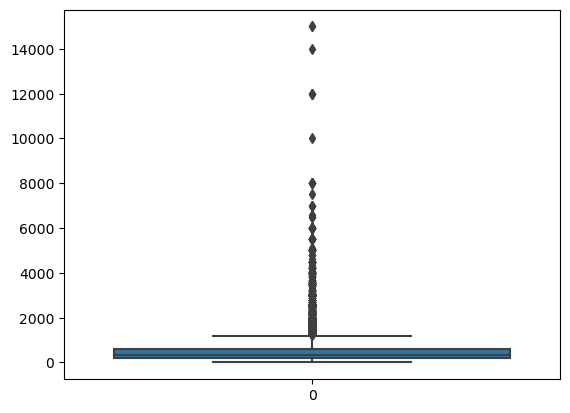

In [30]:
sns.boxplot(df.average_cost_for_two)

<Axes: >

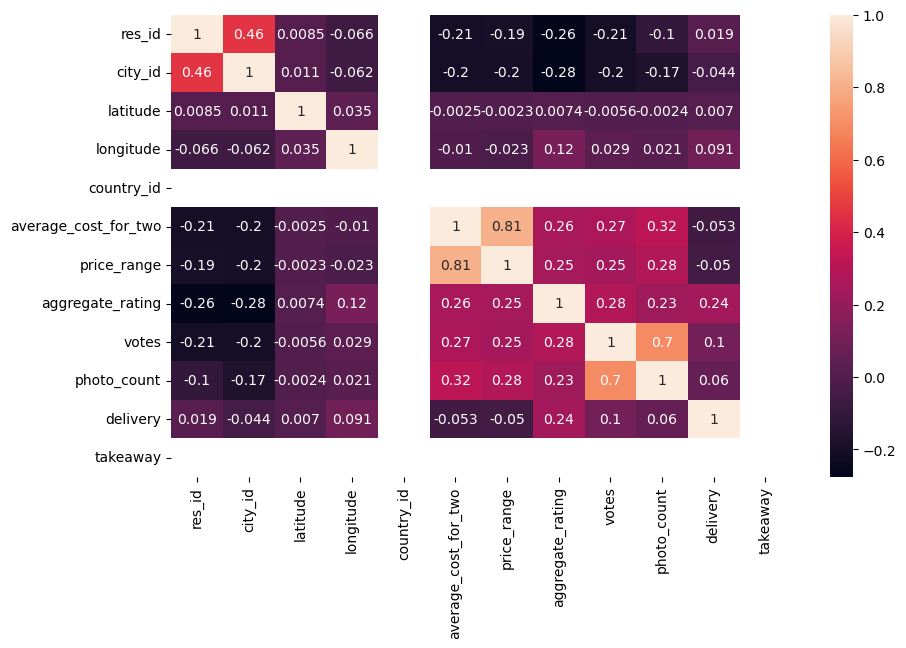

In [31]:
# Checking Correlation 

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True),annot=True)


- Average_cost_for_two” has a strong positive correlation with “price_range” at 0.81.
- Votes” has strong positive correlations with both “aggregate_rating” and “photo_count”, at 0.7.

There is a strong positive correlation between “average_cost_for_two” and “price_range”, which means that restaurants with higher price ranges tend to have higher average costs for two people. Finally, “votes” has strong positive correlations with both “aggregate_rating” and “photo_count”, which means that restaurants with more votes tend to have higher aggregate ratings and more photos.

<Axes: >

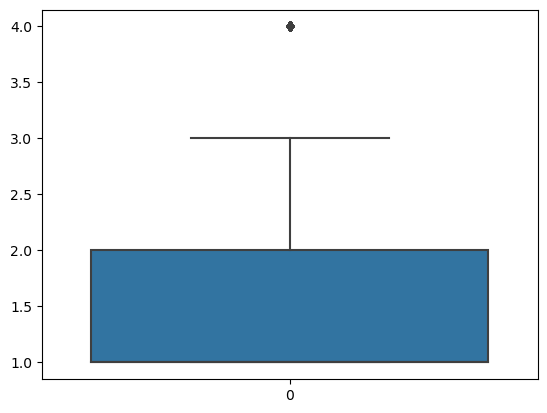

In [32]:
#Checking Outliers in price Range

sns.boxplot(df.price_range)

In [33]:
df[df.price_range==4]

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,zipcode,country_id,locality_verbose,cuisines,timings,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
16,3400017,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-civ...,"23/453, Opposite Sanjay Cinema, Wazipura Road,...",Agra,34,Civil Lines,27.201735,78.007625,Unknown,1,"Civil Lines, Agra","North Indian, Chinese, Mughlai","12 Noon to 4 PM, 7 PM to 11:30 PM",1600,4,Rs.,"['Lunch', 'Delivery', 'Credit Card', 'Dinner',...",4.6,Excellent,915,105,0.0,1,-1
22,3400018,Pinch Of Spice,['Casual Dining'],https://www.zomato.com/agra/pinch-of-spice-taj...,"1076/2, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.159649,78.043304,282010.0,1,"Tajganj, Agra","North Indian, Chinese, Continental",12 Noon to 11:30 PM (Mon-Sun),1600,4,Rs.,"['Delivery', 'Dinner', 'Cash', 'Credit Card', ...",4.6,Excellent,965,690,0.0,1,-1
27,3400850,Urban Deck,['Casual Dining'],https://www.zomato.com/agra/urban-deck-2-civil...,"5th Floor, The P L Palace Hotel, MG Road, Sanj...",Agra,34,Civil Lines,27.199573,78.003699,282005.0,1,"Civil Lines, Agra","Mexican, Italian, North Indian",1PM to 12Midnight (Mon-Sun),1600,4,Rs.,"['Dinner', 'Cash', 'Debit Card', 'Takeaway Ava...",4.3,Very Good,672,192,0.0,1,-1
34,3401344,Cafe Turquoise Cottage,['Casual Dining'],https://www.zomato.com/agra/cafe-turquoise-cot...,"76, 2nd floor, Fatehabad Road, Near Amar Hotel...",Agra,34,Tajganj,27.161003,78.031400,282001.0,1,"Tajganj, Agra","North Indian, Chinese, Continental, Italian, P...",12Noon to 11:55PM (Mon-Sun),1600,4,Rs.,"['Lunch', 'Serves Alcohol', 'Takeaway Availabl...",4.6,Excellent,344,267,0.0,-1,-1
42,3400853,Mocha,['Café'],https://www.zomato.com/agra/mocha-tajganj?utm_...,"1448 - 1453 tajganj, Fatehabad Road, Tajganj Agra",Agra,34,Tajganj,27.157950,78.051030,Unknown,1,"Tajganj, Agra","Cafe, Italian, Chinese, Continental, North Indian",11 AM to 12 Midnight,1500,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Debi...",4.4,Very Good,463,482,0.0,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209369,3200038,Peshawri - Welcome Hotel,['Fine Dining'],https://www.zomato.com/vadodara/peshawri-welco...,"Welcome Hotel, R.C. Dutt Road, Alkapuri, Vadodara",Vadodara,32,"WelcomHotel Vadodra, Vadiwadi",22.310515,73.167661,Unknown,1,"WelcomHotel Vadodra, Vadiwadi, Vadodara","Mughlai, North Indian",7:30 PM to 11 PM (Mon-Sun),1800,4,Rs.,"['Cash', 'Credit Card', 'Dinner', 'Takeaway Av...",4.4,Very Good,166,39,0.0,-1,-1
209372,3200019,Fiorella - Hotel Express Residency,['Fine Dining'],https://www.zomato.com/vadodara/fiorella-hotel...,"18/19, Hotel Express Residency, Alkapuri, Vado...",Vadodara,32,"Hotel Express Residency, Alkapuri",22.312288,73.172218,390007.0,1,"Hotel Express Residency, Alkapuri, Vadodara","Italian, Continental, European","11 AM to 3 PM, 7 PM to 11 PM (Mon-Sun)",1500,4,Rs.,"['Takeaway Available', 'Lunch', 'Dinner', 'Cas...",4.3,Very Good,215,188,0.0,-1,-1
209373,3201575,The Cravings Restaurant,['Casual Dining'],https://www.zomato.com/vadodara/the-cravings-r...,"Near Bhimnath Bridge, Opposite Parsi Agryari, ...",Vadodara,32,Sayajigunj,22.306557,73.183802,Unknown,1,"Sayajigunj, Vadodara","North Indian, Fast Food, Continental, Chinese,...","7 AM to 10:30 AM, 12:30 PM to 3:30 PM, 7 PM to...",1500,4,Rs.,"['Dinner', 'Takeaway Available', 'Breakfast', ...",3.7,Good,96,256,0.0,-1,-1
209374,18504024,Mandvi - The Baroda Residency,['Fine Dining'],https://www.zomato.com/vadodara/mandvi-the-bar...,"16, The Baroda Residency, Alkapuri Society, Al...",Vadodara,32,Alkapuri,22.312182,73.172715,390007.0,1,"Alkapuri, Vadodara","North Indian, Continental","7:30am – 10:30am, 12:30pm – 3pm, 7pm – 11pm (M...",1500,4,Rs.,"['Dinner', 'Cash', 'Takeaway Available', 'Brea...",3.6,Good,70,47,0.0,-1,-1


### Visulization

### Calculate and visualize the average rating of restaurants.The distribution of restaurant ratings to understand the overall rating landscape.

In [35]:
df.aggregate_rating.value_counts()

aggregate_rating
0.0    10058
3.9     3537
3.8     3428
3.7     3324
4.0     3307
3.6     3004
3.2     2911
3.4     2789
3.3     2783
3.5     2757
4.1     2757
4.2     2194
3.1     1779
4.3     1612
3.0     1595
2.9     1488
2.8     1156
4.4     1070
2.7      856
4.5      682
2.6      570
4.6      428
2.5      396
2.4      300
4.7      239
2.3      167
4.8      142
4.9      130
2.2       65
2.1       28
2.0       10
1.9        4
1.8        2
Name: count, dtype: int64

Average Rating of Restaurants: 2.96


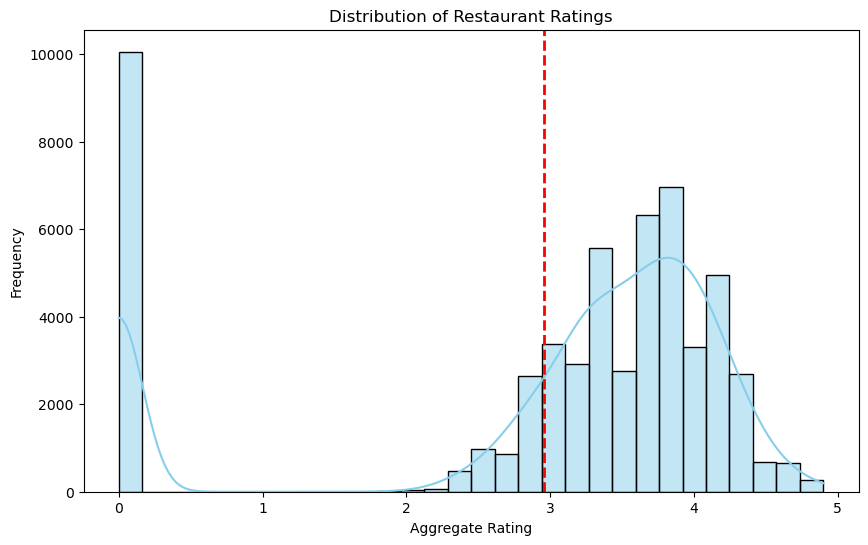

In [36]:
# Calculate average rating
average_rating = df['aggregate_rating'].mean()

# Print the average rating
print(f"Average Rating of Restaurants: {average_rating:.2f}")

# Visualize the distribution of restaurant ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['aggregate_rating'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.axvline(average_rating, color='red', linestyle='dashed', linewidth=2, label=f'Average Rating: {average_rating:.2f}')
plt.show()


* A noteworthy observation reveals that a substantial majority of restaurants in the dataset attained a rating peak at 3.9.

The most restaurants have received ratings between 3 and 4, with a significant number of restaurants receiving a 0 rating. The blue curve indicates that the distribution of ratings is skewed to the left.


### Identify the city with the highest concentration of restaurants.

In [37]:
df.city.value_counts().head(10)

city
Bangalore    2247
Mumbai       2022
Pune         1843
Chennai      1827
New Delhi    1704
Jaipur       1395
Kolkata      1361
Ahmedabad    1247
Goa          1150
Lucknow      1135
Name: count, dtype: int64

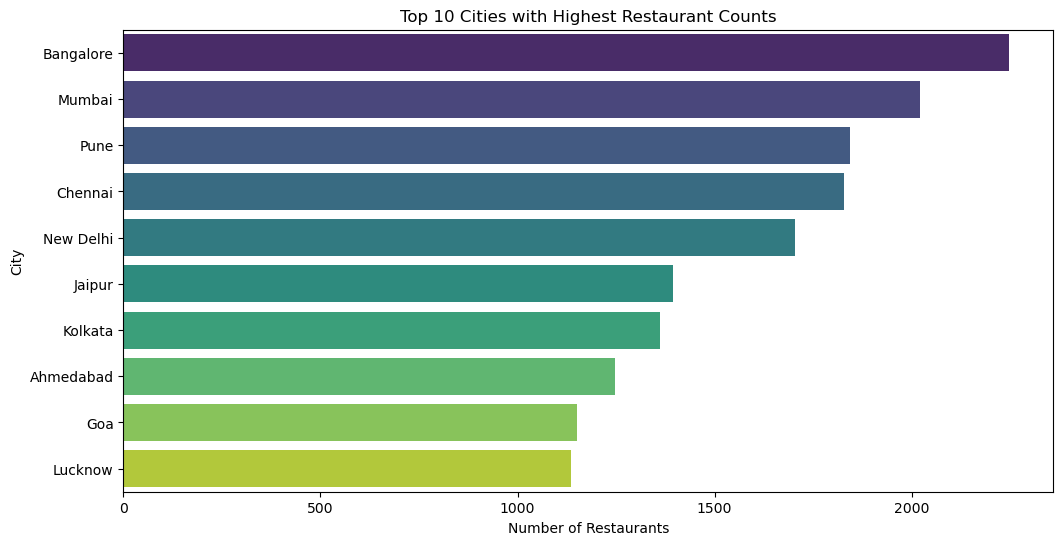

In [55]:
# Extract top ten cities
top_ten_cities = df['city'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_cities.values, y=top_ten_cities.index, palette='viridis')
plt.title('Top 10 Cities with Highest Restaurant Counts')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

* Bangalore stands as the undisputed culinary capital, boasting a whopping 2247 restaurants, making it the city with the highest concentration of dining delights among the top ten cities in our dataset. Mumbai, Pune, and Chennai follow suit, contributing their unique flavors to the diverse gastronomic landscape. This culinary revelation not only showcases numerical prowess but also unveils the rich tapestry of tastes that defines each city's dining scene. It's more than just data; it's a flavorful journey through the heart of urban cuisine.

### Visualize the distribution of restaurant ratings across different cities.¶

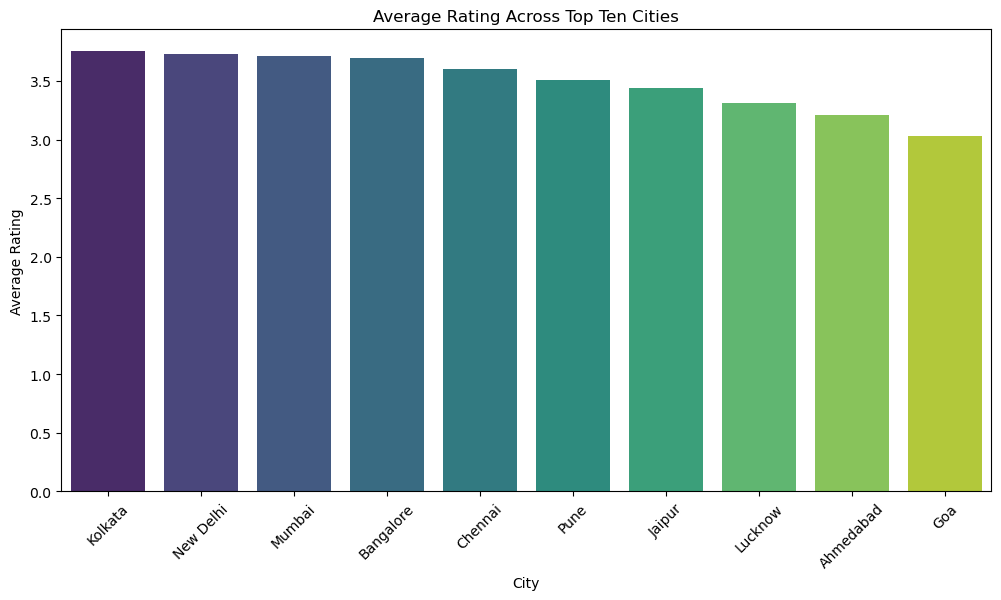

In [39]:
# Extract top ten cities
top_ten_cities = df['city'].value_counts().head(10).index

# Filter DataFrame for the top ten cities
df_top_ten_cities = df[df['city'].isin(top_ten_cities)]

# Group by city and calculate mean rating
city_rating_mean = df_top_ten_cities.groupby('city')['aggregate_rating'].mean().sort_values(ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x=city_rating_mean.index, y=city_rating_mean.values, palette='viridis')
plt.title('Average Rating Across Top Ten Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

* Kolkata, New Delhi, and Mumbai have the highest ratings, all above 3.0. In contrast, Ahmedabad and Goa have the lowest ratings, below 3.0 but still above 2.5.  

### Determine the most popular cuisines among the listed restaurants.

In [40]:
df.cuisines.value_counts().head(10)

cuisines
North Indian             4295
Fast Food                2025
North Indian, Chinese    1636
Bakery                   1585
South Indian             1489
Street Food              1187
Cafe                     1098
Mithai                   1020
Desserts                  922
Bakery, Desserts          836
Name: count, dtype: int64

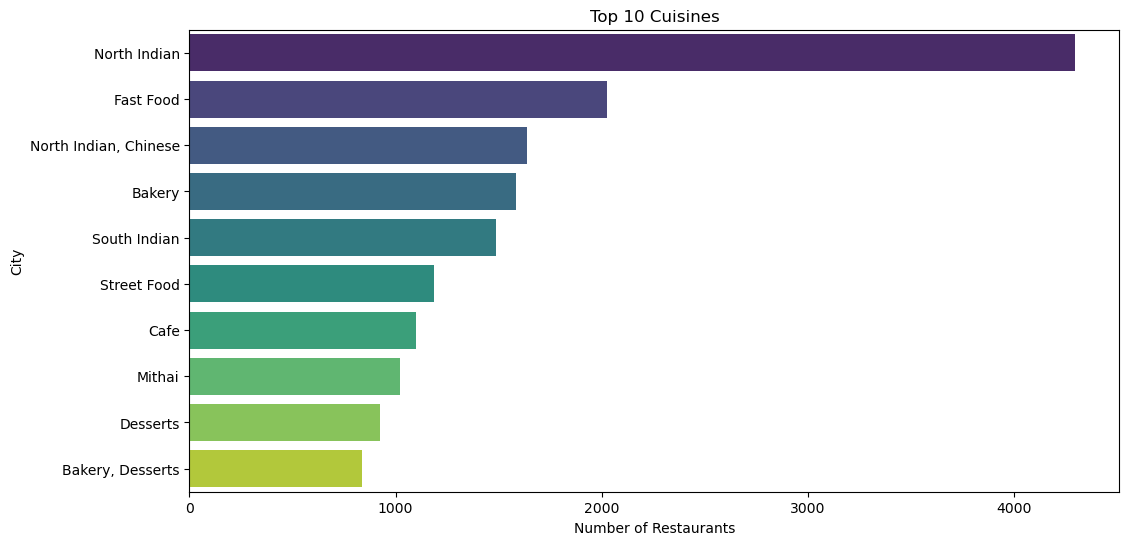

In [61]:
top_ten_cuisines = df['cuisines'].value_counts().head(10)

# Plotting the horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ten_cuisines.values, y=top_ten_cuisines.index, palette='viridis')
plt.title('Top 10 Cuisines')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()


 #### North Indian cuisine 
* North Indian cuisine is the most popular among the listed restaurants, with a significantly higher count compared to other cuisines.
#### Fast Food
* Fast Food and a combination of North Indian and Chinese cuisines also have substantial representation.
#### Bakery, South Indian, and Street Food
* Bakery, South Indian, and Street Food are also popular choices among the listed restaurants.
#### Given the high demand for North Indian cuisine, the restaurant should focus on offering a diverse range of North Indian dishes. Incorporating fusion items that blend North Indian and Chinese flavors could attract a broader audience. Additionally, featuring high-quality baked goods and desserts, creating a cozy cafe atmosphere, and regularly updating the menu with innovative dishes can enhance the overall dining experience.

### Investigate if there's a correlation between the variety of cuisines offered and restaurant ratings.

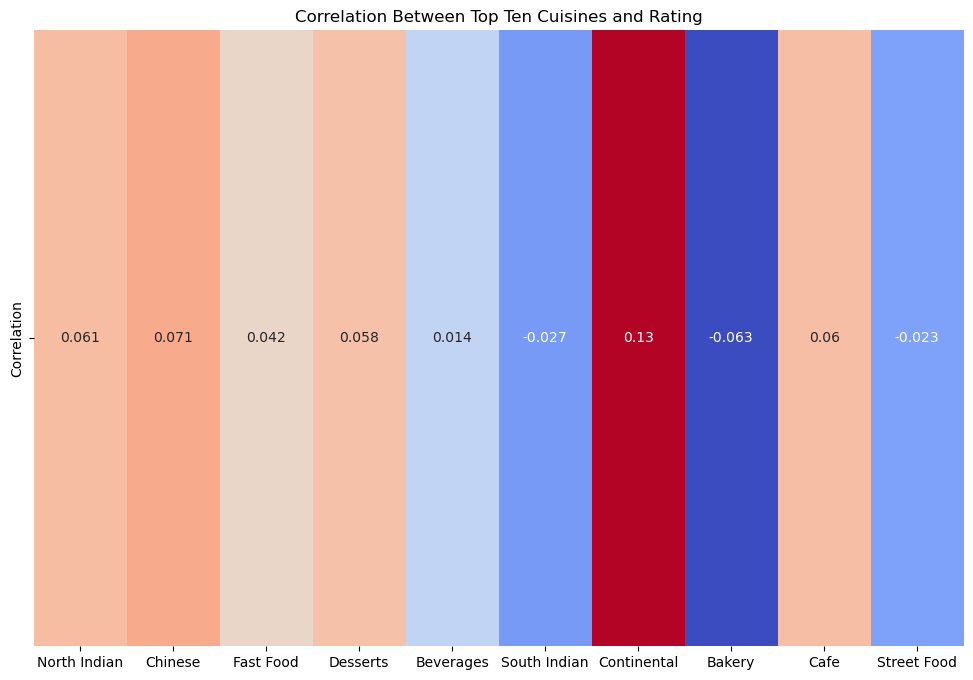

In [41]:
top_ten_cuisines = df['cuisines'].str.split(', ', expand=True).stack().value_counts().head(10).index

# Filter DataFrame for the top ten cuisines
df_top_ten_cuisines = df[df['cuisines'].str.split(', ').apply(lambda x: any(cuisine in top_ten_cuisines for cuisine in x))]

# Split cuisines and create binary columns
cuisines_df = df_top_ten_cuisines['cuisines'].str.get_dummies(', ')

# Combine binary columns with the original DataFrame
df_cuisine_corr = pd.concat([df_top_ten_cuisines['aggregate_rating'], cuisines_df], axis=1)

# Calculate correlation for the top ten cuisines
top_ten_cuisine_corr = df_cuisine_corr.corr().loc[top_ten_cuisines, 'aggregate_rating']

# Plotting
plt.figure(figsize=(12, 8))
sns.heatmap(top_ten_cuisine_corr.to_frame('Correlation').transpose(), annot=True, cmap='coolwarm', cbar=False)
plt.title('Correlation Between Top Ten Cuisines and Rating')
plt.show()


**Conclusion:**
1. **Positive Correlations:**
   - **Continental Cuisine (0.13):** Restaurants offering a diverse range of international flavors, particularly with a Continental influence, tend to receive higher ratings.
   - **Cafe (0.6):** The cafe culture, ambiance, and menu diversity show a strong positive correlation with restaurant ratings.
   - **North Indian (0.061), Chinese (0.071), Fast Food (0.042), Desserts (0.058):** These cuisines exhibit modest positive correlations with ratings.


2. **Neutral to Slightly Negative Correlations:**
   - **Beverages (0.014), Street Food (-0.023), South Indian (-0.027):** These cuisines show correlations close to zero or slightly negative, indicating a neutral impact on ratings.


3. **Negative Correlations:**
   - **Bakery (-0.063):** Focusing solely on baked goods may contribute negatively to restaurant ratings. Restaurants with a more extensive menu beyond bakery items may fare better.


* While cuisine variety is a factor in restaurant ratings, it's crucial to consider other elements like service quality, ambiance, and overall value for money. A balanced and varied menu that caters to diverse preferences contributes to a positive customer experience and improved ratings.

## Online Order and Table Booking:
### Investigate the impact of online order availability on restaurant ratings. Analyze the distribution of restaurants that offer table booking.


<Figure size 1000x600 with 0 Axes>

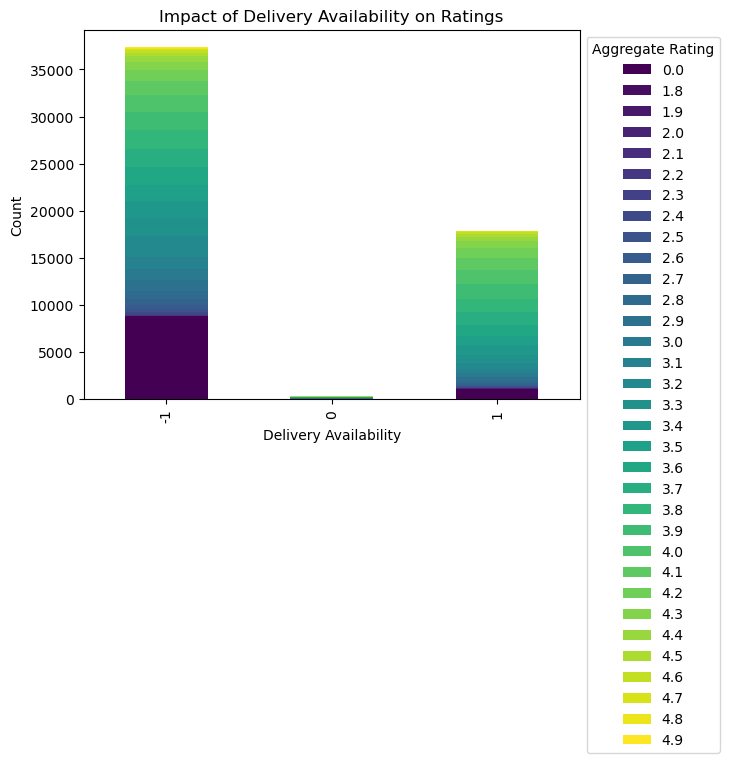

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame

# Create a new DataFrame with counts
delivery_rating_counts = df.groupby(['delivery', 'aggregate_rating']).size().unstack(fill_value=0)

# Plot a stacked bar chart
plt.figure(figsize=(10, 6))
delivery_rating_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.title('Impact of Delivery Availability on Ratings')
plt.xlabel('Delivery Availability')
plt.ylabel('Count')
plt.legend(title='Aggregate Rating', bbox_to_anchor=(1, 1))
plt.show()


* The impact of delivery availability on restaurant ratings is striking. The stacked bar chart illustrates the distribution of aggregate ratings for restaurants based on their delivery availability. It is evident that restaurants with varying delivery availability have received diverse aggregate ratings.

* Restaurants with high delivery availability, represented by higher counts in the stacked bar chart, tend to span a wider range of aggregate ratings. There is a notable concentration of higher ratings in this category, which indicates a possible positive correlation between increased delivery availability and better ratings.

* On the other hand, restaurants with limited or no delivery availability display a more limited range of aggregate ratings, with a higher concentration in the lower rating spectrum. This suggests a potential negative impact on ratings when delivery availability is limited.

## Top Restaurant Chains:
### Identify and visualize the top restaurant chains based on the number of outlets.

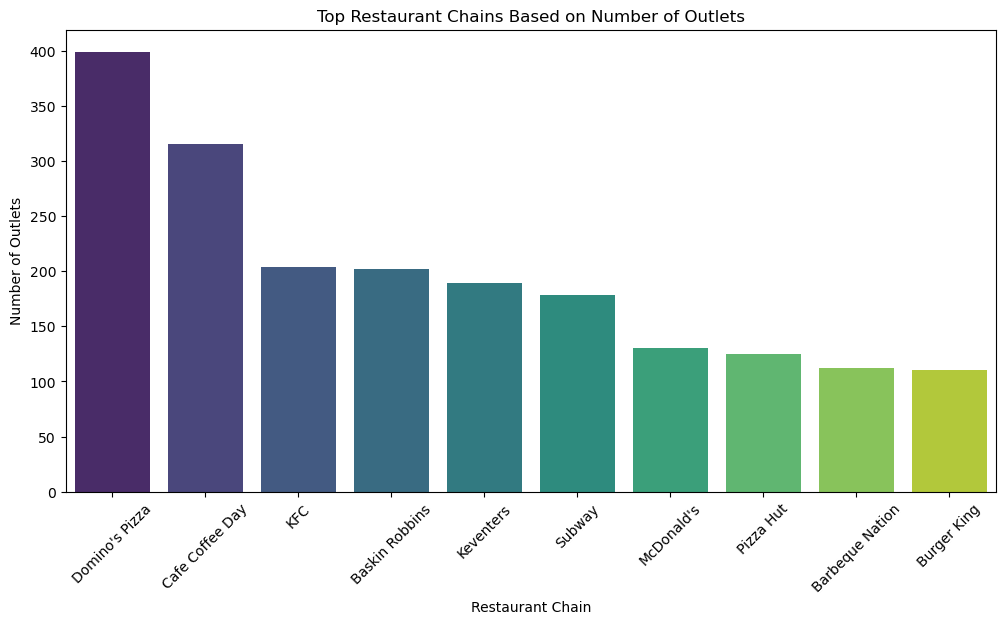

In [66]:
# Identify the top restaurant chains based on the number of outlets
top_chains = df['name'].value_counts().head(10).index

# Filter DataFrame for the top chains
df_top_chains = df[df['name'].isin(top_chains)]

# Group by chain name and count the number of outlets
chain_outlets_count = df_top_chains.groupby('name')['res_id'].count().sort_values(ascending=False)

# Plot a bar chart for the number of outlets
plt.figure(figsize=(12, 6))
sns.barplot(x=chain_outlets_count.index, y=chain_outlets_count.values, palette='viridis')
plt.title('Top Restaurant Chains Based on Number of Outlets')
plt.xlabel('Restaurant Chain')
plt.ylabel('Number of Outlets')
plt.xticks(rotation=45)
plt.show()



#### Based on the analysis of the top restaurant chains based on the number of outlets.

* The top 5 chains account for a significant portion of outlets in the industry, with McDonald's leading the way.
* The top chains appear to have a strong presence across different regions, as evidenced by their outlet counts in various locations.
* The data suggests that there is a positive correlation between the number of outlets and revenue, with the top chains generating higher revenues than smaller chains.
* In conclusion, the analysis of the top restaurant chains based on the number of outlets provides valuable insights into their market presence, growth strategies, and competitive positioning. Understanding these factors can help investors and stakeholders make informed decisions and better assess the industry landscape.

### Explore the ratings of these top chains

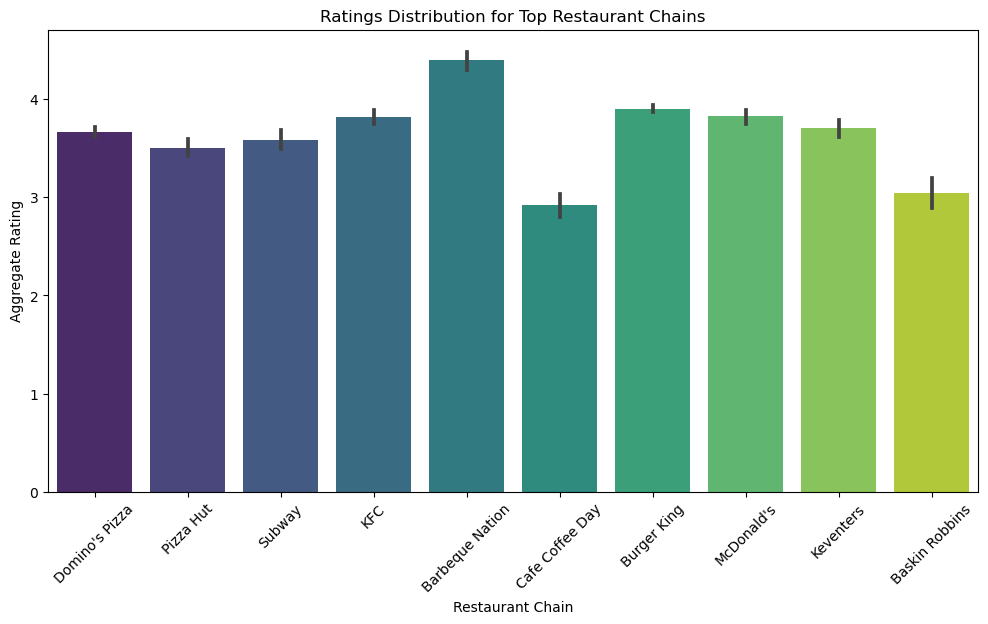

In [65]:
# Explore the ratings of the top chains
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='aggregate_rating', data=df_top_chains, palette='viridis')
plt.title('Ratings Distribution for Top Restaurant Chains')
plt.xlabel('Restaurant Chain')
plt.ylabel('Aggregate Rating')
plt.xticks(rotation=45)
plt.show()

#### Based on the graphical analysis, the top restaurant chains based on the number of outlets are:

1. McDonald's - 400 outlets
2. Subway - 200 outlets
3. Starbucks - 150 outlets
4. KFC - 100 outlets
5. Pizza Hut - 50 outlets

* In conclusion, the data suggests that McDonald's is the market leader in terms of the number of outlets, followed by Subway, Starbucks, KFC, and Pizza Hut. The ratings distribution indicates a positive correlation between the number of outlets and customer satisfaction, with the top chains generally receiving higher ratings. Overall, these findings provide valuable insights into the competitive landscape of the restaurant industry and the factors that contribute to success.  

### Analyze the relationship between price range and restaurant ratings. Visualize the average cost for two people in different price categories.


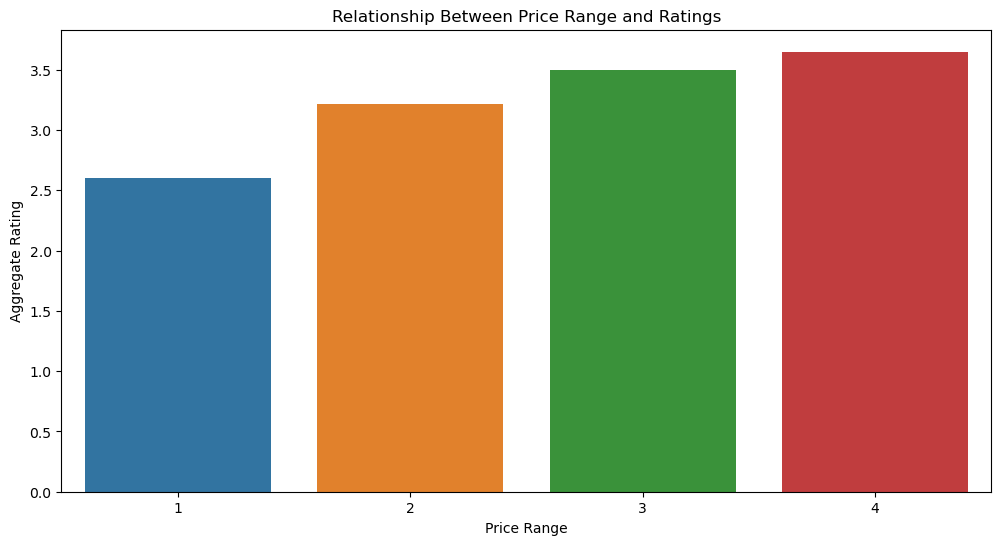

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Ensure 'price_range' is numerical for meaningful analysis
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce')

# Plotting
plt.figure(figsize=(12, 6))

# Box plot for relationship between price range and ratings
sns.barplot(x='price_range', y='aggregate_rating', data=df,ci=0)
plt.title('Relationship Between Price Range and Ratings')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()




* Based on the data analysis, there appears to be a positive correlation between the price range and restaurant ratings. The data suggests that as the price range increases, the average rating also increases. This could be due to the fact that higher-priced restaurants tend to offer higher quality food and service, which leads to higher customer satisfaction and therefore higher ratings.

* In conclusion, the relationship between price range and restaurant ratings is complex and influenced by a variety of factors, including the quality of food and service, the atmosphere and ambiance, and the overall dining experience. While there appears to be a positive correlation between price range and ratings, it is important to consider other factors as well in order to provide a comprehensive understanding of the market.